In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from numpy import pi
from qiskit.quantum_info import Statevector

In [2]:
def qft_rotations(circuit, n) :
    if n == 0 :
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n) :
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

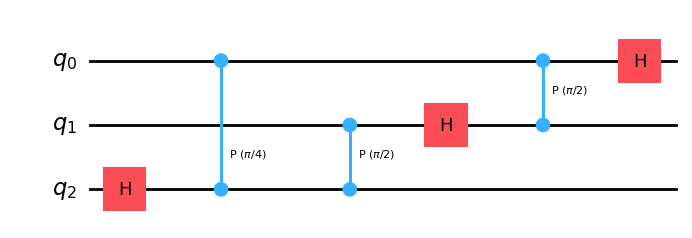

In [3]:
qc = QuantumCircuit(3)
qft_rotations(qc, 3)
qc.draw('mpl')

In [4]:
def swap_registers(circuit, n) :
    for qubit in range(n // 2) :
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [5]:
def qft(circuit, n) :
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

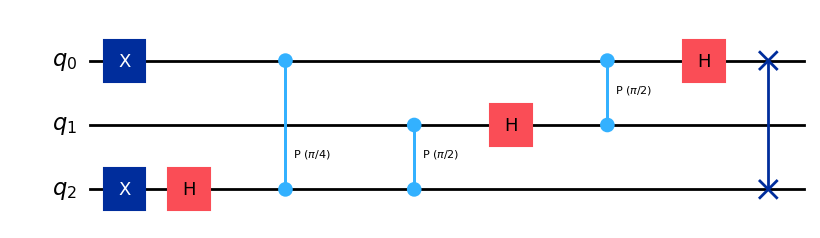

In [6]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
qft(qc, 3)
qc.draw('mpl')

In [7]:
qc.save_statevector()


Quantum state is: Statevector([ 0.354-0.j   , -0.25 -0.25j ,  0.   +0.354j,  0.25 -0.25j ,
             -0.354+0.j   ,  0.25 +0.25j , -0.   -0.354j, -0.25 +0.25j ],
            dims=(2, 2, 2))


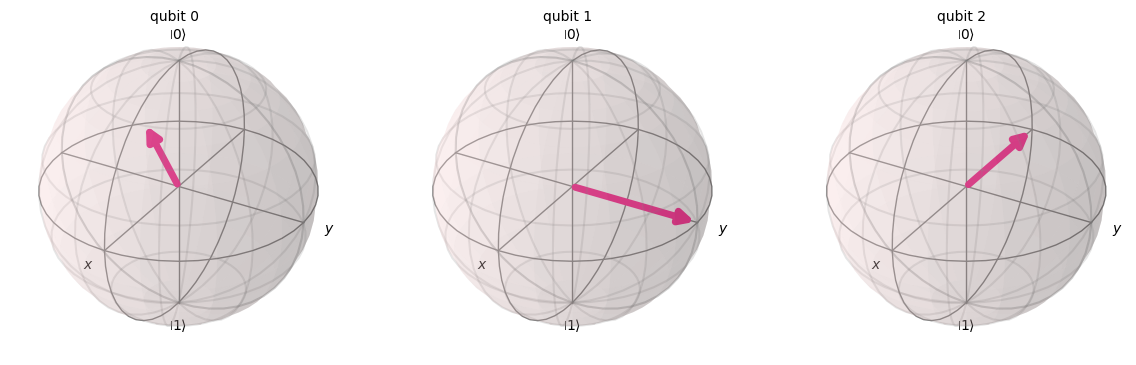

In [8]:
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc)

result = job.result()
statevector = result.get_statevector(qc, decimals = 3)
# Print the quantum state
print("\nQuantum state is:", statevector)

# Plot the Bloch multivector
plot_bloch_multivector(statevector)

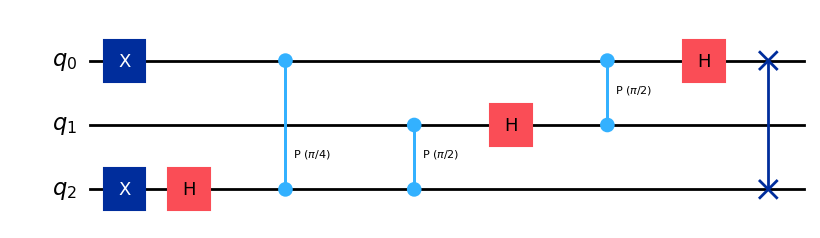

In [9]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
qft(qc, 3)
qc.draw('mpl')

In [ ]:
# Create the quantum circuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

# Select backend
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit
job = backend.run(circuit, shots=1024)

# Get the results
result = job.result().get_counts()
print(result)

In [ ]:
# Create the quantum circuit
circuit = QuantumCircuit(2)
circuit.h(0)          # Apply Hadamard gate to qubit 0
circuit.cx(0, 1)      # Apply CNOT gate with control on qubit 0 and target on qubit 1

# Add measurements
circuit.measure_all()  # Measure all qubits

# Select backend
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit
job = backend.run(circuit, shots=1024)

# Get the results
result = job.result().get_counts()
print(result)

In [ ]:
print("sharda")